>TOC
```
Step 0. XHR이란
Step 1. KOSPI 200 거래 정보 가져오기
Step 2. 환율 정보 가져오기
Step 3. 데이터 병합
Step 4. 평균 및 표준편차를 포함한 시계열 데이터 그리기
Step 5. 표준화를 통해 시계열 겹쳐보기
```

원달러 환율이 치솟다가 최근 잠잠해진 분위기입니다. 달러에 투자하는 경우, 1100원대 이하로 떨어지면 일반적으로 싼 가격이라 생각하고 선물 ETF나 달러 예금에 투자합니다. 이는 꽤 합리적입니다 

과거 시계열상 원달러 환율의 움직임을 살펴보고, 투자 의사결정에 대한 근거를 마련해보도록 하겠습니다.

## Step 0. XHR 이란

XHR은 XMLHttpRequest의 약자로, Ajax처럼 페이지 리로드 없이 서버의 데이터를 불러올 수 있는 통신 방식입니다. 브라우저 상에서 제공하는 객체 형태의 API라고 이해하면 좀 더 와닿겠습니다.

그래서 이 XHR은 기본적으로 브라우저가 웹서버와 통신하기 위한 수단이지만, 우리가 직접 사용해 웹 서버에서 직접 원하는 데이터를 호출할 수도 있습니다. 방식은 크게 2가지로, POST와 GET 방식이 있습니다. 여기서 두 케이스를 모두 경험해 보기 위해 코스피 정보는 krx정보데이터시스템에서, 달러 정보는 yahoofinance에서 긁어보도록 하겠습니다. 참고로 이렇게 사이트마다 데이터를 호출하는 방식이 다르기 때문에 데이터를 수집하고자 한다면 어떤 형태로 서버와 통신하는지 사전에 확인해야 합니다.

## Step 1. KOSPI 200 거래 정보 가져오기

먼저, 두 방식 모두 url 주소로 데이터를 요청하게 되며 python은 requests 패키지를 사용합니다. POST 방식의 경우 requests.post() 함수를 사용하는데, 이때 요청 정보를 함께 넘겨줘야 합니다.

아래 화면은 Safari 브라우저에서 개발자 모드를 켠 다음 네트워크 탭의 XHR 영역을 보여줍니다. 해당 영역 하단에 '요청 데이터'라는 부분이 보입니다. POST 방식은 이렇게 요청할 데이터를 넘겨주면 해당하는 데이터를 다시 반환해 주는 구조입니다. 코드에서는 이 부분을 payloads 객체로 만들어서 requests.post(url, data=payloads) 형태로 넘겨줬습니다.

![image](./images/step1.png)

In [29]:
from pykrx import stock
from datetime import datetime
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [30]:
period_m = pd.period_range('201901', '202206', freq='M')
period_m = period_m.to_timestamp()
period_m

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [31]:
import requests

In [32]:
today = datetime.today().strftime('%Y%m%d')
payloads = {
    'bld': 'dbms/MDC/STAT/standard/MDCSTAT00702',
    'locale': 'ko_KR',
    'searchType': 'P',
    'idxIndMidclssCd': '02',
    'trdDd': today,
    'tboxindTpCd_finder_equidx0_0': '코스피 200',
    'indTpCd': '1',
    'indTpCd2':'028',
    'codeNmindTpCd_finder_equidx0_0': '코스피 200',
    'strtDd': '20100101',
    'endDd': today,
    'csvxls_isNo': 'false'
}

In [33]:
res = requests.post('http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd', data=payloads)
res

<Response [200]>

In [34]:
kospi_200 = pd.DataFrame(res.json()['output'])
kospi_200.columns = ['일자','종가','-','대비','등락률','PER','선행PER','PBR','배당수익률']
kospi_200


일자      종가  -     대비    등락률    PER 선행PER   PBR 배당수익률
0     2022/06/03  352.01  1   1.50   0.43   9.78  9.95  1.04  2.06
1     2022/06/02  350.51  2  -4.03  -1.14   9.74  9.91  1.04  2.07
2     2022/05/31  354.54  1   2.05   0.58   9.86  9.78  1.05  2.05
3     2022/05/30  352.49  1   4.45   1.28   9.80  9.67  1.04  2.06
4     2022/05/27  348.04  1   3.78   1.10   9.67  9.69  1.03  2.08
...          ...     ... ..    ...    ...    ...   ...   ...   ...
3060  2010/01/08  222.66  1   1.35   0.61  23.07     -  1.42  1.14
3061  2010/01/07  221.31  2  -3.36  -1.50  22.93     -  1.41  1.15
3062  2010/01/06  224.67  1   1.83   0.82  23.25     -  1.43  1.14
3063  2010/01/05  222.84  2  -0.65  -0.29  23.04     -  1.42  1.15
3064  2010/01/04  223.49  1   1.63   0.73  23.12     -  1.42  1.14

[3065 rows x 9 columns]

In [35]:
kospi_200.drop(['-'], axis=1, inplace=True) # 대비 및 등락률 음/양 표시
kospi_200

일자      종가     대비    등락률    PER 선행PER   PBR 배당수익률
0     2022/06/03  352.01   1.50   0.43   9.78  9.95  1.04  2.06
1     2022/06/02  350.51  -4.03  -1.14   9.74  9.91  1.04  2.07
2     2022/05/31  354.54   2.05   0.58   9.86  9.78  1.05  2.05
3     2022/05/30  352.49   4.45   1.28   9.80  9.67  1.04  2.06
4     2022/05/27  348.04   3.78   1.10   9.67  9.69  1.03  2.08
...          ...     ...    ...    ...    ...   ...   ...   ...
3060  2010/01/08  222.66   1.35   0.61  23.07     -  1.42  1.14
3061  2010/01/07  221.31  -3.36  -1.50  22.93     -  1.41  1.15
3062  2010/01/06  224.67   1.83   0.82  23.25     -  1.43  1.14
3063  2010/01/05  222.84  -0.65  -0.29  23.04     -  1.42  1.15
3064  2010/01/04  223.49   1.63   0.73  23.12     -  1.42  1.14

[3065 rows x 8 columns]

In [36]:
kospi_200['일자'] = kospi_200['일자'].apply(lambda x : x.replace('/','-'))
kospi_200

일자      종가     대비    등락률    PER 선행PER   PBR 배당수익률
0     2022-06-03  352.01   1.50   0.43   9.78  9.95  1.04  2.06
1     2022-06-02  350.51  -4.03  -1.14   9.74  9.91  1.04  2.07
2     2022-05-31  354.54   2.05   0.58   9.86  9.78  1.05  2.05
3     2022-05-30  352.49   4.45   1.28   9.80  9.67  1.04  2.06
4     2022-05-27  348.04   3.78   1.10   9.67  9.69  1.03  2.08
...          ...     ...    ...    ...    ...   ...   ...   ...
3060  2010-01-08  222.66   1.35   0.61  23.07     -  1.42  1.14
3061  2010-01-07  221.31  -3.36  -1.50  22.93     -  1.41  1.15
3062  2010-01-06  224.67   1.83   0.82  23.25     -  1.43  1.14
3063  2010-01-05  222.84  -0.65  -0.29  23.04     -  1.42  1.15
3064  2010-01-04  223.49   1.63   0.73  23.12     -  1.42  1.14

[3065 rows x 8 columns]

## Step 2. 환율 정보 가져오기

다음은 yahoofinance입니다. 여기는 GET 방식으로 데이터를 가져오고 있으며, 별도의 '요청 데이터'는 넘겨주지 않아도 됩니다. 하지만 아래 화면에서 'header'를 url과 함께 넘겨줬는데, 이는 서버에서 보안상 헤더가 없는 요청은 봇이나 침입으로 감지하고 차단하기 때문입니다. 헤더 없이 요청하면 403 에러를 볼 수 있는데, 모든 사이트가 그런 것은 아니지만 yahoofinance처럼 데이터를 서비스하는 사이트는 대부분 이러한 최소한의 조치를 하고 있습니다.

![image](./images/step2.png)

yahoofinance에서 원 달러 환율 정보를 요청할 때 기간 등 여러 가지 옵션을 선택할 수 있는데, 예를 들면 언제부터 언제까지 며칠 주기의 데이터를 확인할 것인지에 대한 정보를 넘겨줘야 합니다. 보통 이런 부분들을 POST로 구현하는데 yahoofinance의 경우 url 내에 query 형태로 던져주는 방식을 취하고 있습니다. 그래서 상단의 URL 부분을 보면 굉장히 긴데, 요청하고자 하는 정보가 담겨있다고 보면 됩니다.

긴 내용 중에 우리가 눈여겨볼 부분은 period1, period2, 그리고 interval 부분입니다. 짐작할 수 있듯이 period1은 조회 시작 날짜, period2는 조회 마지막 날짜, interval은 조회 간격입니다. period는 기본적으로 unix 시간을 채택하고 있습니다. 참고로 unix 시간 체계는 1970년부터 초 단위로 계산되는 표준 시간 단위이며, python을 사용해 오늘 날짜를 unix 시간으로 변경할 수 있습니다. 우리는 yahoofinance에서 제공하는 최대 기간을 모두 조회할 것이기 때문에 period1은 0으로 설정했습니다. unix 시간은 정수형이기 때문에 꼭 특정 값을 입력하지 않고 가장 작은 숫자를 입력해 줘도 알아서 최솟값을 잡아줍니다. 물론 서버마다 처리 로직이 다를 수 있으니 무조건 통용되는 방법은 아닙니다.

In [ ]:
today = datetime.today().strftime('%Y%m%d')
header = {
    'Accept': 'application/json, text/plain, */*',
    'Origin': 'https://finance.yahoo.com',
    'Accept-Encoding': 'gzip, deflate, br',
    'Host': 'query1.finance.yahoo.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.5 Safari/605.1.15',
    'Referer': 'https://finance.yahoo.com/quote/KRW%3DX/chart?p=KRW%3DX',
    'Accept-Language': 'ko-KR,ko;q=0.9',
    'Connection': 'keep-alive',
    'domain-id': 'kr'

}

In [38]:
today_unix = int(datetime.today().timestamp())
today_unix

1654418990

In [39]:
res = requests.get(f'https://query1.finance.yahoo.com/v8/finance/chart/KRW=X?symbol=KRW%3DX&period1=0&period2={today_unix}\
                    &useYfid=true&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US\
                    &crumb=FaSnnHtSp6P&corsDomain=finance.yahoo.com', headers=header)
res

<Response [200]>

이렇게 데이터를 호출하면 json 형태의 결괏값을 받을 수 있는데, 계층 구조가 눈에 확 들어오지 않기 때문에 key 값을 한 단계씩 조회해 보면서 데이터를 확인하면 됩니다.

In [40]:
res.json()

{'chart': {'result': [{'meta': {'currency': 'KRW',
     'symbol': 'KRW=X',
     'exchangeName': 'CCY',
     'instrumentType': 'CURRENCY',
     'firstTradeDate': 1070236800,
     'regularMarketTime': 1654345944,
     'gmtoffset': 3600,
     'timezone': 'BST',
     'exchangeTimezoneName': 'Europe/London',
     'regularMarketPrice': 1250.58,
     'chartPreviousClose': 1198.4,
     'priceHint': 4,
     'currentTradingPeriod': {'pre': {'timezone': 'BST',
       'start': 1654210800,
       'end': 1654210800,
       'gmtoffset': 3600},
      'regular': {'timezone': 'BST',
       'start': 1654210800,
       'end': 1654297140,
       'gmtoffset': 3600},
      'post': {'timezone': 'BST',
       'start': 1654297140,
       'end': 1654297140,
       'gmtoffset': 3600}},
     'dataGranularity': '1d',
     'range': '',
     'validRanges': ['1d',
      '5d',
      '1mo',
      '3mo',
      '6mo',
      '1y',
      '2y',
      '5y',
      '10y',
      'ytd',
      'max']},
    'timestamp': [1070236800

In [41]:
res.json().keys()

dict_keys(['chart'])

In [42]:
res.json()['chart']

{'result': [{'meta': {'currency': 'KRW',
    'symbol': 'KRW=X',
    'exchangeName': 'CCY',
    'instrumentType': 'CURRENCY',
    'firstTradeDate': 1070236800,
    'regularMarketTime': 1654345944,
    'gmtoffset': 3600,
    'timezone': 'BST',
    'exchangeTimezoneName': 'Europe/London',
    'regularMarketPrice': 1250.58,
    'chartPreviousClose': 1198.4,
    'priceHint': 4,
    'currentTradingPeriod': {'pre': {'timezone': 'BST',
      'start': 1654210800,
      'end': 1654210800,
      'gmtoffset': 3600},
     'regular': {'timezone': 'BST',
      'start': 1654210800,
      'end': 1654297140,
      'gmtoffset': 3600},
     'post': {'timezone': 'BST',
      'start': 1654297140,
      'end': 1654297140,
      'gmtoffset': 3600}},
    'dataGranularity': '1d',
    'range': '',
    'validRanges': ['1d',
     '5d',
     '1mo',
     '3mo',
     '6mo',
     '1y',
     '2y',
     '5y',
     '10y',
     'ytd',
     'max']},
   'timestamp': [1070236800,
    1070323200,
    1070409600,
    107049600

이렇게 찾아가다 보면 우리가 필요한 두 list를 추출할 수 있는데, 하나는 시간이고 다른 하나는 환율 정보입니다.

In [43]:
timestamps = list(map(datetime.fromtimestamp, res.json()['chart']["result"][0]['timestamp']))
timestamps

[datetime.datetime(2003, 12, 1, 9, 0),
 datetime.datetime(2003, 12, 2, 9, 0),
 datetime.datetime(2003, 12, 3, 9, 0),
 datetime.datetime(2003, 12, 4, 9, 0),
 datetime.datetime(2003, 12, 5, 9, 0),
 datetime.datetime(2003, 12, 8, 9, 0),
 datetime.datetime(2003, 12, 9, 9, 0),
 datetime.datetime(2003, 12, 10, 9, 0),
 datetime.datetime(2003, 12, 11, 9, 0),
 datetime.datetime(2003, 12, 12, 9, 0),
 datetime.datetime(2003, 12, 15, 9, 0),
 datetime.datetime(2003, 12, 16, 9, 0),
 datetime.datetime(2003, 12, 17, 9, 0),
 datetime.datetime(2003, 12, 18, 9, 0),
 datetime.datetime(2003, 12, 19, 9, 0),
 datetime.datetime(2003, 12, 22, 9, 0),
 datetime.datetime(2003, 12, 23, 9, 0),
 datetime.datetime(2003, 12, 24, 9, 0),
 datetime.datetime(2003, 12, 25, 9, 0),
 datetime.datetime(2003, 12, 26, 9, 0),
 datetime.datetime(2003, 12, 29, 9, 0),
 datetime.datetime(2003, 12, 30, 9, 0),
 datetime.datetime(2003, 12, 31, 9, 0),
 datetime.datetime(2004, 1, 1, 9, 0),
 datetime.datetime(2004, 1, 2, 9, 0),
 datetime.d

In [44]:
closes = res.json()['chart']["result"][0]['indicators']['quote'][0]['close']
closes

[1198.4000244140625,
 1195.0,
 1192.5,
 1190.0999755859375,
 1184.699951171875,
 1185.5999755859375,
 1182.699951171875,
 1176.4000244140625,
 1169.9000244140625,
 1173.199951171875,
 1179.9000244140625,
 1179.800048828125,
 1187.0,
 1183.800048828125,
 1192.800048828125,
 1195.5,
 1195.4000244140625,
 1200.5,
 1199.300048828125,
 1200.699951171875,
 1186.0999755859375,
 1194.800048828125,
 1189.9000244140625,
 1181.5999755859375,
 1195.800048828125,
 1178.9000244140625,
 1189.4000244140625,
 1176.800048828125,
 1171.0,
 1181.300048828125,
 1168.800048828125,
 1175.300048828125,
 1175.199951171875,
 1174.5,
 1186.699951171875,
 1187.5,
 1176.699951171875,
 1184.199951171875,
 1187.699951171875,
 1175.199951171875,
 1174.5,
 1167.800048828125,
 1176.4000244140625,
 1158.199951171875,
 1160.0,
 1158.4000244140625,
 1170.300048828125,
 1168.9000244140625,
 1157.699951171875,
 1167.300048828125,
 1152.800048828125,
 1165.5999755859375,
 1160.9000244140625,
 1159.199951171875,
 1159.6999511

In [45]:
usd_krw = pd.DataFrame(data={
    '일자' : [x.strftime('%Y-%m-%d') for x in timestamps],
    '환율': closes
})

usd_krw

일자           환율
0     2003-12-01  1198.400024
1     2003-12-02  1195.000000
2     2003-12-03  1192.500000
3     2003-12-04  1190.099976
4     2003-12-05  1184.699951
...          ...          ...
4826  2022-05-31  1236.170044
4827  2022-06-01  1241.739990
4828  2022-06-02  1246.949951
4829  2022-06-03  1240.839966
4830  2022-06-04  1250.579956

[4831 rows x 2 columns]

## Step 3. 데이터 병합

이렇게 KOSPI 200과 환율 정보를 확보했으므로 데이터를 합쳐주겠습니다.

In [46]:
kospi_200

일자      종가     대비    등락률    PER 선행PER   PBR 배당수익률
0     2022-06-03  352.01   1.50   0.43   9.78  9.95  1.04  2.06
1     2022-06-02  350.51  -4.03  -1.14   9.74  9.91  1.04  2.07
2     2022-05-31  354.54   2.05   0.58   9.86  9.78  1.05  2.05
3     2022-05-30  352.49   4.45   1.28   9.80  9.67  1.04  2.06
4     2022-05-27  348.04   3.78   1.10   9.67  9.69  1.03  2.08
...          ...     ...    ...    ...    ...   ...   ...   ...
3060  2010-01-08  222.66   1.35   0.61  23.07     -  1.42  1.14
3061  2010-01-07  221.31  -3.36  -1.50  22.93     -  1.41  1.15
3062  2010-01-06  224.67   1.83   0.82  23.25     -  1.43  1.14
3063  2010-01-05  222.84  -0.65  -0.29  23.04     -  1.42  1.15
3064  2010-01-04  223.49   1.63   0.73  23.12     -  1.42  1.14

[3065 rows x 8 columns]

In [47]:
usd_krw

일자           환율
0     2003-12-01  1198.400024
1     2003-12-02  1195.000000
2     2003-12-03  1192.500000
3     2003-12-04  1190.099976
4     2003-12-05  1184.699951
...          ...          ...
4826  2022-05-31  1236.170044
4827  2022-06-01  1241.739990
4828  2022-06-02  1246.949951
4829  2022-06-03  1240.839966
4830  2022-06-04  1250.579956

[4831 rows x 2 columns]

In [48]:
df = pd.merge(left=kospi_200, right=usd_krw, how='inner', on='일자')
df

일자      종가     대비    등락률    PER 선행PER   PBR 배당수익률           환율
0     2022-06-03  352.01   1.50   0.43   9.78  9.95  1.04  2.06  1240.839966
1     2022-06-02  350.51  -4.03  -1.14   9.74  9.91  1.04  2.07  1246.949951
2     2022-05-31  354.54   2.05   0.58   9.86  9.78  1.05  2.05  1236.170044
3     2022-05-30  352.49   4.45   1.28   9.80  9.67  1.04  2.06  1251.589966
4     2022-05-27  348.04   3.78   1.10   9.67  9.69  1.03  2.08  1258.890015
...          ...     ...    ...    ...    ...   ...   ...   ...          ...
3060  2010-01-08  222.66   1.35   0.61  23.07     -  1.42  1.14  1123.099976
3061  2010-01-07  221.31  -3.36  -1.50  22.93     -  1.41  1.15  1134.900024
3062  2010-01-06  224.67   1.83   0.82  23.25     -  1.43  1.14  1130.400024
3063  2010-01-05  222.84  -0.65  -0.29  23.04     -  1.42  1.15  1141.300049
3064  2010-01-04  223.49   1.63   0.73  23.12     -  1.42  1.14  1132.400024

[3065 rows x 9 columns]

일자를 기준으로 inner join 방식의 집계를 사용했습니다. 두 데이터의 길이가 다르기 때문에 중복 구간만 추출하는 것입니다. 우리는 여기서 종가, per, pbr, 환율만 사용할 것이며 4개의 데이터는 분석을 위해 모두 실수형으로 변환해 줘야 합니다. 또한 index는 '일자'로 설정해 줘서 시계열 분석이 편하도록 세팅합니다.

In [49]:
df_ts = df[['일자','종가','PER','PBR','환율']]
df_ts.columns = ['date','close', 'per', 'pbr', 'exc_price']
df_ts = df_ts.set_index(df_ts['date'].astype('datetime64')).drop('date',axis=1)
df_ts = df_ts.astype('float64')
df_ts

close    per   pbr    exc_price
date                                        
2022-06-03  352.01   9.78  1.04  1240.839966
2022-06-02  350.51   9.74  1.04  1246.949951
2022-05-31  354.54   9.86  1.05  1236.170044
2022-05-30  352.49   9.80  1.04  1251.589966
2022-05-27  348.04   9.67  1.03  1258.890015
...            ...    ...   ...          ...
2010-01-08  222.66  23.07  1.42  1123.099976
2010-01-07  221.31  22.93  1.41  1134.900024
2010-01-06  224.67  23.25  1.43  1130.400024
2010-01-05  222.84  23.04  1.42  1141.300049
2010-01-04  223.49  23.12  1.42  1132.400024

[3065 rows x 4 columns]

## Step 4. 평균 및 표준편차를 포함한 시계열 데이터 그리기

10년간 각 지표의 평균치를 붉은 점선으로 그렸고, 붉은 박스 영역은 평균으로부터 1 표준편차 이내의 영역을 알려줍니다. 이는 각 지표의 높낮이에 대한 가늠좌가 되어줍니다.

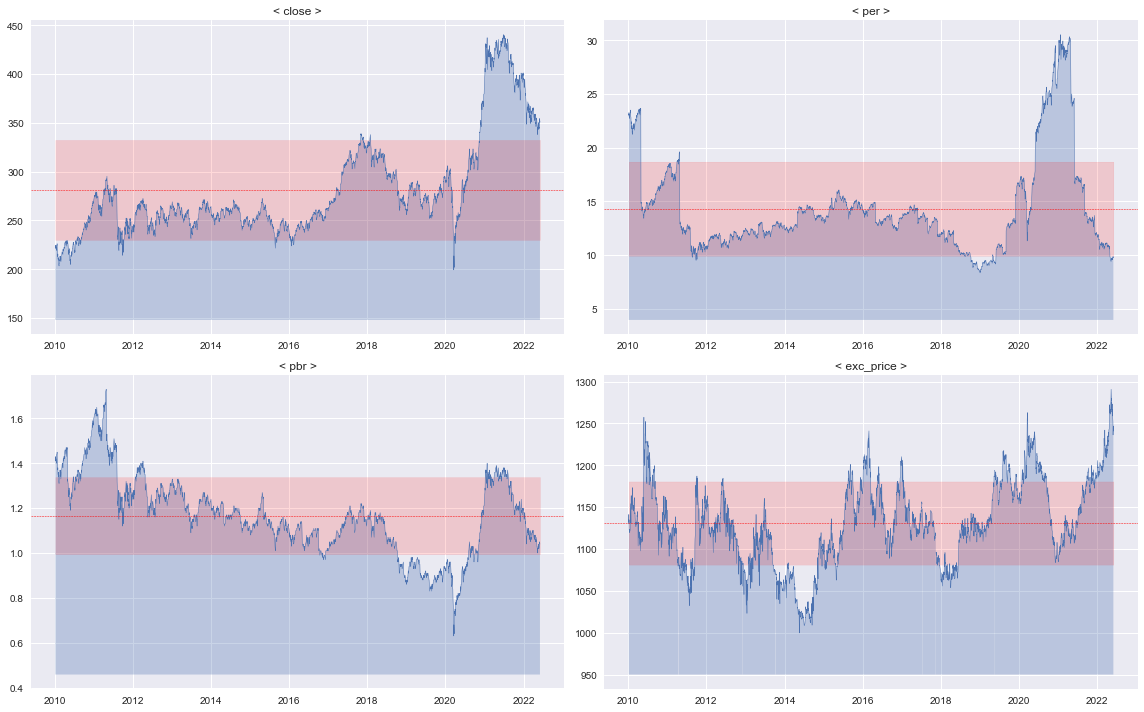

In [50]:
plt.figure(figsize=(16,10))
for i in range(len(df_ts.columns)):
    plt.subplot(int(f'22{i+1}'))
    plt.plot(df_ts.iloc[:,i], linewidth=0.5)
    plt.axhline(df_ts.iloc[:,i].mean(), color='r', linewidth=0.5, linestyle='--')
    plt.fill_between(x=df_ts.index, 
                     y1=df_ts.iloc[:,i], 
                     y2=df_ts.iloc[:,i].min() - df_ts.iloc[:,i].std(), 
                     alpha=0.3)
    plt.fill_between(x=df_ts.index, 
                     y1=df_ts.iloc[:,i].mean() + df_ts.iloc[:,i].std(), 
                     y2=df_ts.iloc[:,i].mean() - df_ts.iloc[:,i].std(), 
                     color='r', alpha=0.15)
    plt.title(f'< {df_ts.columns[i]} >')

plt.tight_layout()
plt.show()    

최근 코스피 200 종가는 표준편차 밴드 위에 있는 반면, per과 pbr은 밴드 아주 하단에 위치하고 있습니다. 따라서 코스피가 지난 10년 대비 비싸진 것은 맞지만 고평가 된 것이라 보기는 어렵습니다. 2020년부터 치솟은 가격을 생각하면 지금은 역시 나쁘지 않은 가격대입니다.

이러한 데이터를 보고, "달러가 너무 비싼 것 같으니 달러 선물 인버스를 사야겠다." 혹은 "코스피가 좀 떨어진 것 같으니 주식을 슬슬 모아가야겠다." 등의 판단을 하게 되는데, 행동으로 옮기기 전에 달러가 올라간 것 대비 코스피가 어느 정도로 내려왔는가를 한번 더 확인해볼 필요가 있습니다.

## Step 5. 표준화를 통해 시계열 겹쳐보기

위 그래프를 보면 y 축의 수치가 모두 다릅니다. 그래프를 겹쳐서 보고 싶다면 방법은 2가지인데, 하나는 2중 y 축(왼쪽+오른쪽)을 사용하는 방식, 다른 하나는 각 지표에 대해 표준화 혹은 정규화를 수행하는 방식입니다. 여기서는 후자의 사례를 보여줍니다.

In [51]:
scaled_df = (df_ts - df_ts.mean()) / df_ts.std()
scaled_df

close       per       pbr  exc_price
date                                               
2022-06-03  1.379865 -1.032599 -0.738475   2.211430
2022-06-02  1.350596 -1.041722 -0.738475   2.334508
2022-05-31  1.429232 -1.014354 -0.680243   2.117360
2022-05-30  1.389231 -1.028038 -0.738475   2.427975
2022-05-27  1.302400 -1.057686 -0.796707   2.575024
...              ...       ...       ...        ...
2010-01-08 -1.144108  1.998412  1.474346  -0.160288
2010-01-07 -1.170450  1.966483  1.416114   0.077409
2010-01-06 -1.104888  2.039464  1.532579  -0.013238
2010-01-05 -1.140596  1.991570  1.474346   0.206329
2010-01-04 -1.127913  2.009815  1.474346   0.027050

[3065 rows x 4 columns]

In [57]:
scaled_df.describe()

close           per           pbr     exc_price
count  3.065000e+03  3.065000e+03  3.065000e+03  3.059000e+03
mean  -5.192874e-16 -1.669138e-16  3.709195e-17 -2.304212e-15
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.600316e+00 -1.363296e+00 -3.125992e+00 -2.643399e+00
25%   -6.221424e-01 -5.696229e-01 -6.220104e-01 -6.438371e-01
50%   -3.481834e-01 -2.480484e-01 -3.968905e-02 -5.856113e-02
75%    3.160304e-01  1.351042e-01  6.008644e-01  7.138480e-01
max    3.104597e+00  3.697511e+00  3.279543e+00  3.216802e+00

이렇게 표준화를 해주면 4개의 지표 모두 평균이 0이고 표준편차가 1인 동일한 분포를 가질 수 있습니다.

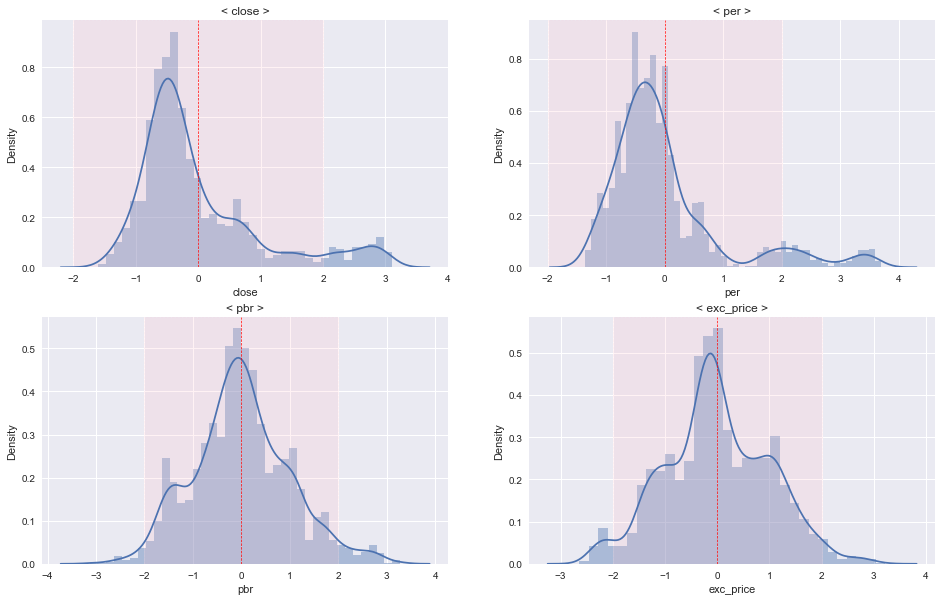

In [52]:
plt.figure(figsize=(16,10))
for i in range(len(scaled_df.columns)):
    plt.subplot(int(f'22{i+1}'))
    sns.distplot(scaled_df.iloc[:,i])
    plt.title(f'< {scaled_df.columns[i]} >')
    plt.axvline(scaled_df.iloc[:,i].mean(), c='r', linewidth=0.7, linestyle='--')
    plt.axvspan(xmin=scaled_df.iloc[:,i].mean()-2*scaled_df.iloc[:,1].std(), 
                xmax=scaled_df.iloc[:,i].mean()+2*scaled_df.iloc[:,1].std(), 
                color='pink', alpha=0.2, linewidth=0.7, linestyle='--')

이제 환율과 나머지 3개 지표를 겹쳐 그려보면 다음과 같습니다.

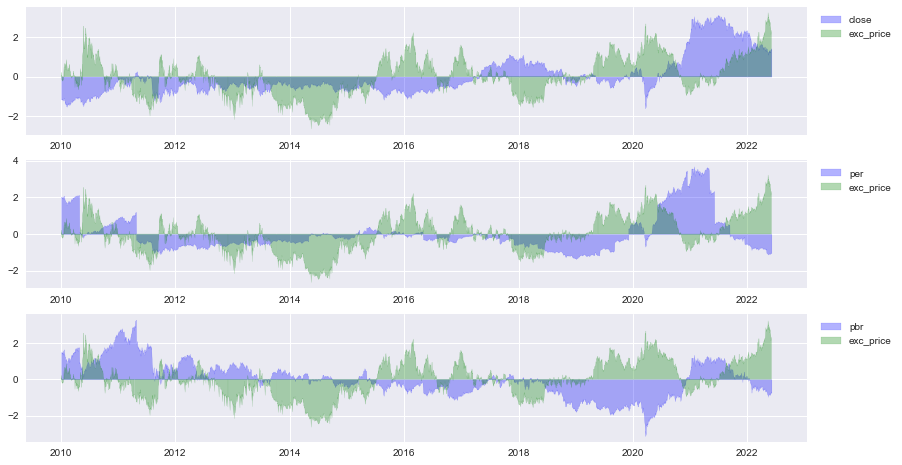

In [53]:
plt.figure(figsize=(14,8))
plt.subplot(311)
plt.fill_between(x=scaled_df.index, y1=scaled_df['close'], alpha=0.3, color='blue', label='close')
plt.fill_between(x=scaled_df.index, y1=scaled_df['exc_price'], alpha=0.3, color='g', label='exc_price')
plt.legend(bbox_to_anchor=(1.12,1))

plt.subplot(312)
plt.fill_between(x=scaled_df.index, y1=scaled_df['per'], alpha=0.3, color='blue', label='per')
plt.fill_between(x=scaled_df.index, y1=scaled_df['exc_price'], alpha=0.3, color='g', label='exc_price')
plt.legend(bbox_to_anchor=(1.12,1))

plt.subplot(313)
plt.fill_between(x=scaled_df.index, y1=scaled_df['pbr'], alpha=0.3, color='blue', label='pbr')
plt.fill_between(x=scaled_df.index, y1=scaled_df['exc_price'], alpha=0.3, color='g', label='exc_price')
plt.legend(bbox_to_anchor=(1.12,1))


plt.show()

원달러(exc_price)와 종가(close), 원달러(exc_price)와 per, 원달러(exc_price)와 pbr을 겹쳐서 그린 그래프입니다. 참고로, 각 그래프를 겹쳐서 보여주기 위해 표준화를 통해 값의 범위를 조정했기 때문에 y축은 평균(0)으로부터 얼마나(편차) 멀리 떨어져 있는가를 보여주는 척도가 되겠습니다.

위 그래프에서 달러와 가장 움직임이 상이한 지표는 pbr임을 알 수 있습니다. 만약 달러 투자를 하거나 달러를 기준으로 주식 투자 여부를 결정하는 사람의 경우 다른 지표보다 pbr을 보는 것이 현재 상황을 더 뚜렷하게 파악하는 데에 도움이 될 수 있습니다. 아래 표는 4개 수치 간 상관관계를 표시해줍니다.

<AxesSubplot:>

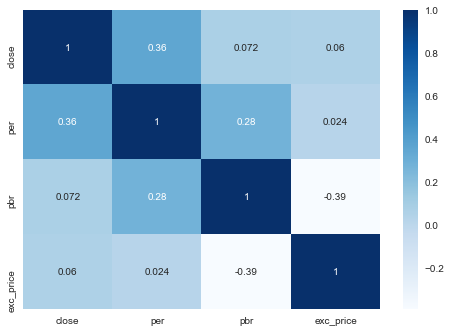

In [55]:
sns.heatmap(scaled_df.corr(), annot=True, cmap='Blues')

확인한 것처럼 원달러(exc_price)와 pbr이 가장 상관관계가 낮습니다. 주가나 per의 경우, 달러의 움직임을 어느 정도 따라서 올라가거나 내려가는, 방향이 겹치는 구간들이 있었습니다.

달러의 움직임을 고려하면 pbr이 강하게 떨어진 것 같지는 않아 보입니다. 그러나 모든 국가가 돈을 엄청나게 풀었기 때문에 기축통화에 더 쏠리는 편향이 있었을 것입니다.

이렇게, 지금이 바닥인가? 고점인가? 는 맞출 수 없겠지만 '지난 10년을 고려했을 때' 상대적으로 달러는 비싸다는 것. 그리고 코스피는 내려와 있다는 것을 통계적으로 확인할 수 있었습니다.